In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import textwrap
import calendar
# to create dataframe containing delay occurrences
df_master = pd.read_excel('/content/TTC-Dataset_clean.xlsx')

In [ ]:
df_master.isnull().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Bound,48617
Line,655
Vehicle,0


In [ ]:
# to clean data
df_master['Line'].unique()

array(['BD', 'YU', 'SHP', 'SRT', nan, 'BD LINE', 'BD/YUS',
       'BLOOR DANFORTH', '31 GREENWOOD', 60, '9 BELLAMY', '45 KIPLING',
       504, '95 YORK MILLS', 500, 'SHEPPARD', '104 FAYWOOD', 'YU/BD',
       '60 STEELES WEST', '25 DON MILLS', 555, '36 FINCH WEST',
       '126 CHRISTIE', '37 ISLINGTON', '504 KING', '29 DUFFERIN',
       '116 MORNINGSIDE', 'BD/YU', '73 ROYAL YORK', 'BLOOR DANFORTH LINE',
       'YU/SHEP', 66, '341 KEELE', '510 SPADINA', '11 BAYVIEW',
       '63 OSSINGTON', '32 EGLINTON WEST', '129 MCCOWAN NORTH', 'YU / BD',
       'YU BD', 'B/D', 'YU/ BD', 'YU - BD', 'YU - BD LINE',
       '85 SHEPPARD EAST', 'YU LINE', 'YU-BD', 'BLOOR DANFORTH LINES',
       999, '16 MCCOWAN', 'YUS', 'YONGE UNIVERSITY SERVI', '704 RAD BUS',
       'YU & BD', 'YU\\BD', '46 MARTIN GROVE', 'RT', 'BLOOR-DANFORTH',
       '134 PROGRESS', '985 SHEPPARD EAST EXPR', '22 COXWELL',
       '100 FLEMINGDON PARK', '35 JANE', 'BLOOR - DANFORTH', 'YU/BD LINE',
       'YUS/BD', '40 JUNCTION-DUNDAS WES'

In [ ]:
# to filter data based on lines and remove Sheppard Line and other incomplete data
line_1_yonge_university = ['YU','95 YORK MILLS','SHEPPARD','36 FINCH WEST','504 KING',
                           '510 SPADINA','32 EGLINTON WEST','YU LINE','YUS',
                           'YONGE UNIVERSITY SERVI','96 WILSON']
line_2_bloor_danforth = ['BD','BD LINE','BLOOR DANFORTH','31 GREENWOOD','45 KIPLING',
                         '126 CHRISTIE','37 ISLINGTON','29 DUFFERIN','73 ROYAL YORK',
                         'BLOOR DANFORTH LINE','KEELE','510 SPADINA','63 OSSINGTON',
                         'B/D','BLOOR DANFORTH LINES','46 MARTIN GROVE','BLOOR-DANFORTH',
                         '22 COXWELL','100 FLEMINGDON PARK','35 JANE','BLOOR - DANFORTH',
                         '71 RUNNYMEDE','102 MARKHAM ROAD','41 KEELE','69 WARDEN SOUTH',
                         '506 CARLTON','BD LINE 2','77 SWANSEA']
combined = ['BD/YUS','YU/BD','BD/YU','YU/SHEP','YU / BD','YU BD','YU/ BD','YU - BD',
            'YU - BD LINE','YU-BD','YU & BD','YU\BD','YU/BD LINE','YUS/BD',
            '40 JUNCTION-DUNDAS WES','YUS/DB','YONGE/UNIVERSITY/BLOOR','YUS & BD']
df = df_master[df_master['Line'].isin(line_1_yonge_university + line_2_bloor_danforth + combined)]
df = df.drop('Bound', axis = 1)
df = df.dropna()
print("Number of entries in df_master is: ", df_master.shape)
print("Number of entries after cleaning is: ", df.shape)
df.isnull().sum()

Number of entries in df_master is:  (195889, 11)
Number of entries after cleaning is:  (180698, 10)


,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Line,0
Vehicle,0
category,0


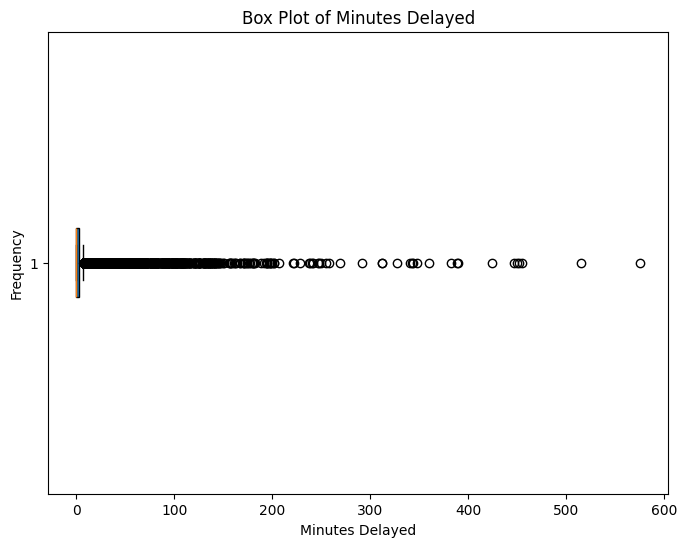

Minimum delay:  0
Maximum delay:  575
Average Delay:  2.3416529236626857


In [ ]:
# to create box plot on minimum delay
plt.figure(figsize=(8, 6))
plt.boxplot(df['Min Delay'], vert=False, patch_artist=True)
plt.title('Box Plot of Minutes Delayed')
plt.xlabel('Minutes Delayed')
plt.ylabel('Frequency')
plt.show()

print("Minimum delay: ", df['Min Delay'].min())
print("Maximum delay: ", df['Min Delay'].max())
print("Average Delay: ", df['Min Delay'].mean())

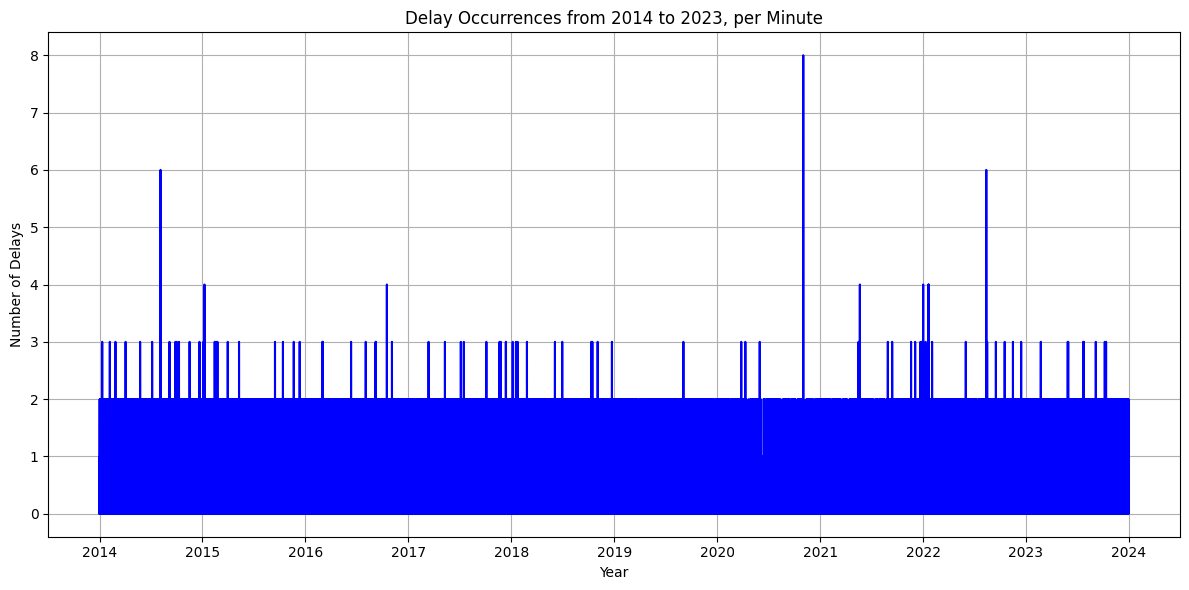

In [ ]:
# to create a new column combining Date and Time into one, then convert it into datetime data type
df['DateTime'] = pd.to_datetime((df['Date']).astype(str) + ' ' + df['Time'].astype(str))

# to count occurrence of delay per minute
delay_counts_per_minute = df.groupby(pd.Grouper(key = 'DateTime', freq = 'min'))['DateTime'].count().reset_index(name = 'delay_counts_per_minute')

# to generate range of timestamps per minute from 2014 to 2023 covering the study period
df_minutes = pd.DataFrame({
    'DateTime': pd.date_range(start = '2014-01-01', end = '2023-12-31', freq = 'min')
})

# to create a data frame merging df_minutes with the count of delay per minute
df_merged_per_minute = pd.merge(df_minutes, delay_counts_per_minute, on = 'DateTime', how = 'left')

# Fill NaN values with 0 for delay occurrences
df_merged_per_minute['delay_counts_per_minute'] = df_merged_per_minute['delay_counts_per_minute'].fillna(0)

# to plot in chart
plt.figure(figsize = (12, 6))
plt.plot(df_merged_per_minute['DateTime'], df_merged_per_minute['delay_counts_per_minute'], label = 'Delay Occurrences', color = 'blue')
plt.title('Delay Occurrences from 2014 to 2023, per Minute')
plt.xlabel('Year')
plt.ylabel('Number of Delays')
plt.grid()
plt.tight_layout()
plt.show()

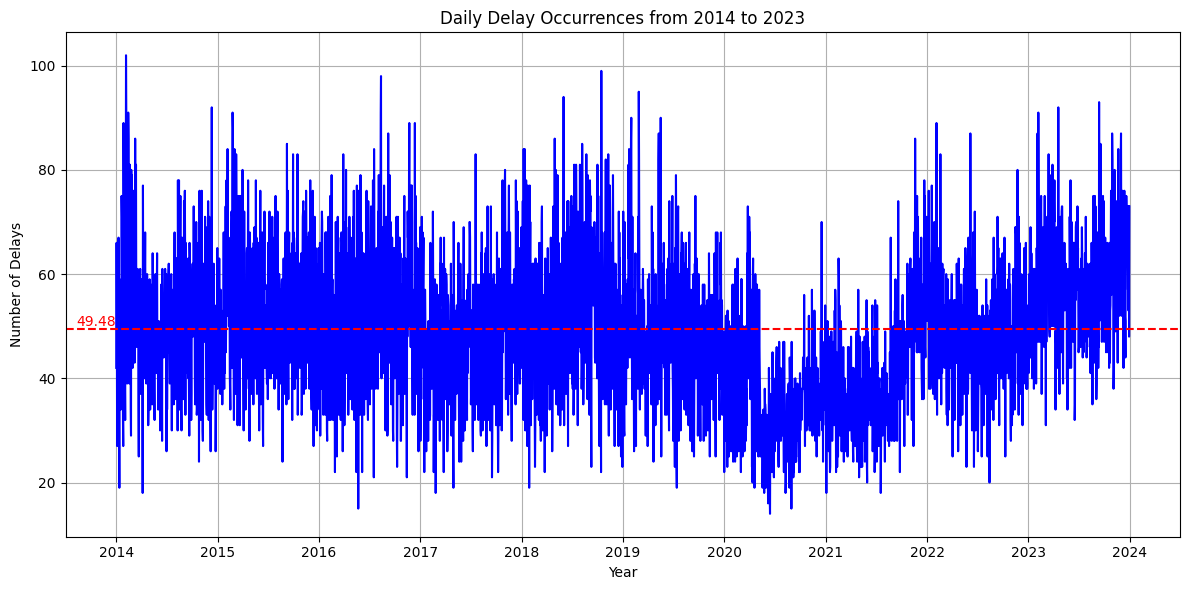

Average Delay per Day:  49.47918948521358


In [ ]:
# to count occurrence of delay per day
delay_counts_per_day = df.groupby(pd.Grouper(key = 'DateTime', freq = 'D'))['DateTime'].count().reset_index(name = 'delay_counts_per_day')

# to get average number of occurrences per day
average_delay_per_day = delay_counts_per_day['delay_counts_per_day'].mean()

# to plot into a chart
plt.figure(figsize = (12, 6))
plt.plot(delay_counts_per_day['DateTime'], delay_counts_per_day['delay_counts_per_day'], label = 'Delay Occurrences', color = 'blue')
plt.title('Daily Delay Occurrences from 2014 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Delays')
plt.axhline(y = average_delay_per_day, color = 'red', linestyle = '--', label = 'Average Delay')
plt.text(df['DateTime'].iloc[1], average_delay_per_day, f'{average_delay_per_day:.2f}', color='red', ha='right', va='bottom')
plt.grid()
plt.tight_layout()
plt.show()
print("Average Delay per Day: ", average_delay_per_day)


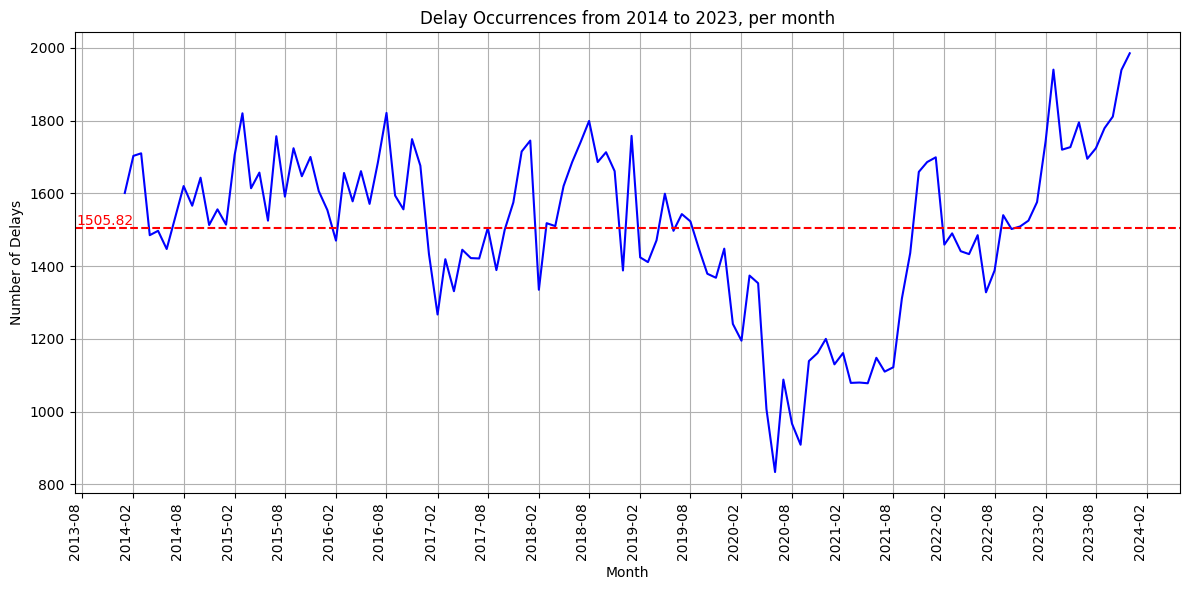

Average Delay per Month:  1505.8166666666666


In [ ]:
# to count occurrence of delay per month
delay_counts_per_month = df.groupby(pd.Grouper(key = 'DateTime', freq = 'MS'))['DateTime'].count().reset_index(name = 'delay_counts_per_month')

# to get average number of occurrences per month
average_delay_per_month = delay_counts_per_month['delay_counts_per_month'].mean()

# to plot in a chart
plt.figure(figsize=(12, 6))
plt.plot(delay_counts_per_month['DateTime'], delay_counts_per_month['delay_counts_per_month'], label = 'Delay Occurrences', color = 'blue')
plt.title('Delay Occurrences from 2014 to 2023, per month')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
plt.xticks(rotation = 90, ha = 'right')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.axhline(y = average_delay_per_month, color = 'red', linestyle = '--', label = 'Average Delay')
plt.text(delay_counts_per_month['DateTime'].iloc[1], average_delay_per_month, f'{average_delay_per_month:.2f}', color = 'red', ha = 'right', va = 'bottom')
plt.grid()
plt.tight_layout()
plt.show()
print("Average Delay per Month: ", average_delay_per_month)


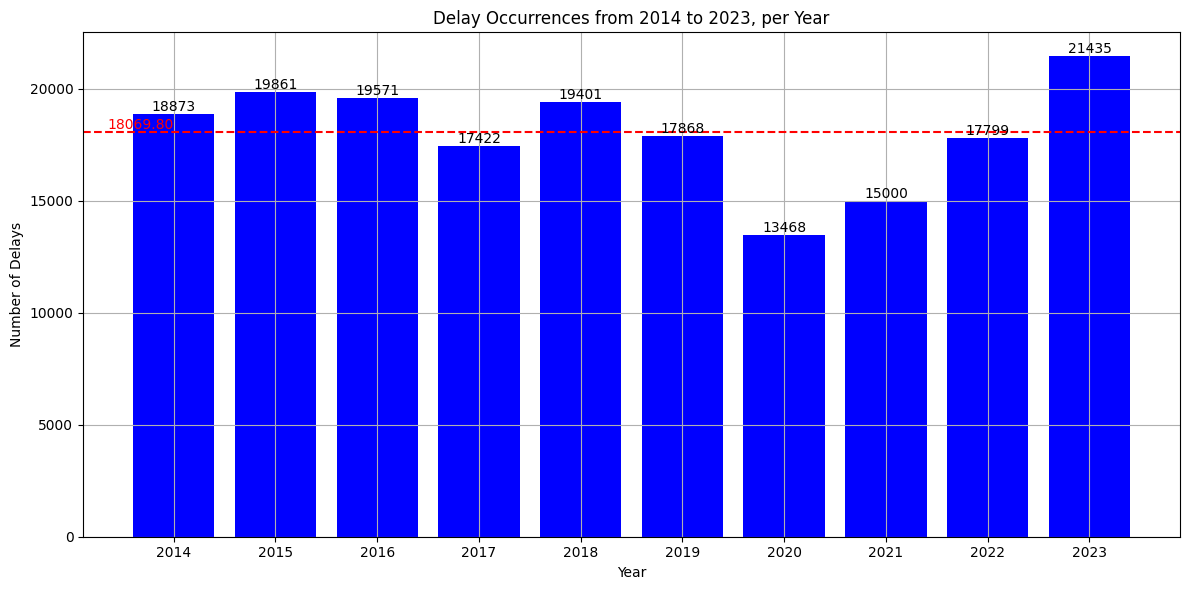

Average Delay per Year:  18069.8


In [ ]:
# to count occurrence of delay per year
delay_counts_per_year = df.groupby(pd.Grouper(key = 'DateTime', freq = 'YS'))['DateTime'].count().reset_index(name = 'delay_counts_per_year')
delay_counts_per_year['Year'] = delay_counts_per_year['DateTime'].dt.year

# to get average number of occurrences per year
average_delay_per_year = delay_counts_per_year['delay_counts_per_year'].mean()

# to plot in chart
plt.figure(figsize = (12, 6))
bars = plt.bar(delay_counts_per_year['Year'], delay_counts_per_year['delay_counts_per_year'], color = 'blue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.0f}', ha='center', va='bottom')
plt.title('Delay Occurrences from 2014 to 2023, per Year')
plt.xticks(delay_counts_per_year['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Delays')
plt.axhline(y = average_delay_per_year, color = 'red', linestyle = '--', label = 'Average Delay')
plt.text(delay_counts_per_year['Year'].iloc[0], average_delay_per_year, f'{average_delay_per_year:.2f}', color = 'red', ha = 'right', va = 'bottom')
plt.grid()
plt.tight_layout()
plt.show()
print("Average Delay per Year: ", average_delay_per_year)

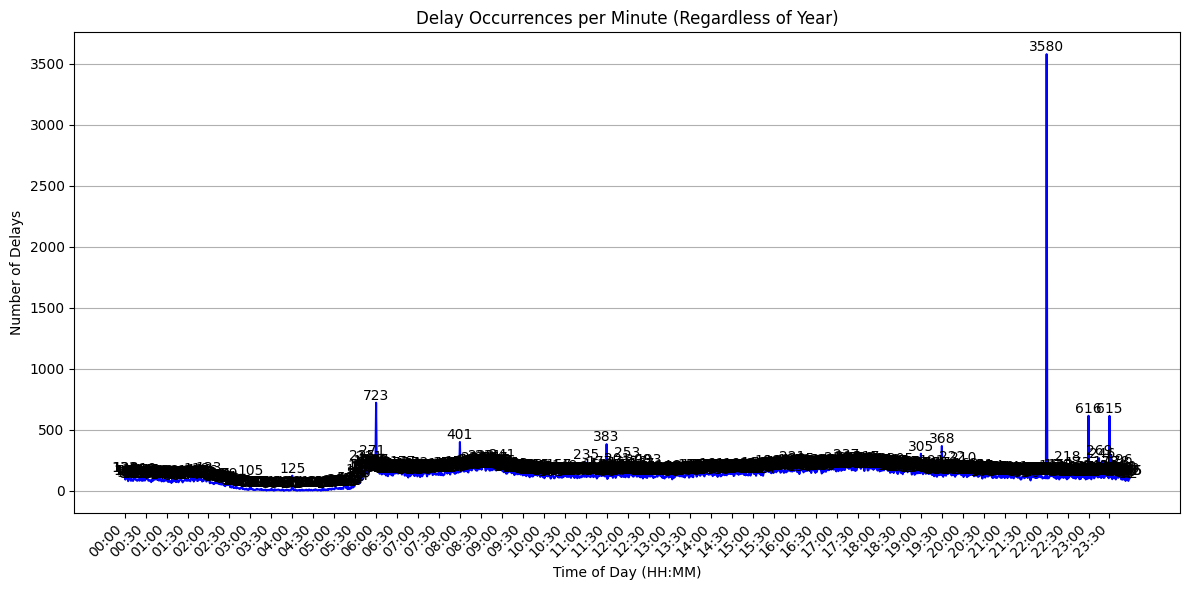

     Minute  delay_counts_per_minute_sansYear
1320  22:00                              3580
360   06:00                               723
1380  23:00                               616
1410  23:30                               615
480   08:00                               401
690   11:30                               383
1170  19:30                               368
1140  19:00                               305
355   05:55                               271
1395  23:15                               269


In [ ]:
# to group data per minute regardless of the year
df['Minute'] = df['DateTime'].dt.strftime('%H:%M')
delay_counts_per_minute_sansYear = df.groupby('Minute')['DateTime'].count().reset_index(name = 'delay_counts_per_minute_sansYear')

# to plot in a chart
plt.figure(figsize=(12, 6))
plt.plot(delay_counts_per_minute_sansYear['Minute'], delay_counts_per_minute_sansYear['delay_counts_per_minute_sansYear'], color='blue')
for x, y in zip(delay_counts_per_minute_sansYear['Minute'], delay_counts_per_minute_sansYear['delay_counts_per_minute_sansYear']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.title('Delay Occurrences per Minute (Regardless of Year)')
plt.xlabel('Time of Day (HH:MM)')
plt.xticks(delay_counts_per_minute_sansYear['Minute'][::30], rotation=45, ha='right')
plt.ylabel('Number of Delays')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top_10_minutes = delay_counts_per_minute_sansYear.sort_values(by=['delay_counts_per_minute_sansYear'], ascending=False).head(10)
print(top_10_minutes)

In [ ]:
# to identify causes of delay during 22:00
category_counts = df[df['Minute'] == '22:00']
category_counts = df[df['Minute'] == '22:00']['category'].value_counts()
category_averages = df[df['Minute'] == '22:00'].groupby('category')['Min Delay'].mean().sort_values(ascending=False)
print(category_counts)

category
Miscellaneous Other                                           3422
Miscellaneous General Delays                                    39
Injured or ill Customer (In Station) - Transported              16
Disorderly Patron                                               16
Miscellaneous Speed Control                                      8
Injured or ill Customer (On Train) - Medical Aid Refused         7
Passenger Assistance Alarm Activated - No Trouble Found          7
Operator Overspeeding                                            7
Passenger Other                                                  6
Injured or ill Customer (In Station) - Medical Aid Refused       4
Escalator/Elevator Incident                                      4
Injured or ill Customer (On Train) - Transported                 4
Operator Violated Signal                                         4
Door Problems - Faulty Equipment                                 4
Assault / Patron Involved                            

In [ ]:
# to identify causes of delay during 06:00
category_counts = df[df['Minute'] == '06:00']['category'].value_counts()
category_counts['Average Duration'] = df.loc[df['Minute'] == '06:00', 'Min Delay'].mean()
print(category_counts)

category
Miscellaneous Other                                        492.000000
Miscellaneous Speed Control                                 40.000000
No Operator Immediately Available - Not E.S.A. Related      32.000000
ATC Project                                                 12.000000
Work Zone Problems - Track                                  10.000000
                                                              ...    
Injured Employee                                             1.000000
Injured or ill Customer (In Station) - Transported           1.000000
Station Other                                                1.000000
Ice / Snow Related Problems                                  1.000000
Average Duration                                             1.618257
Name: count, Length: 63, dtype: float64


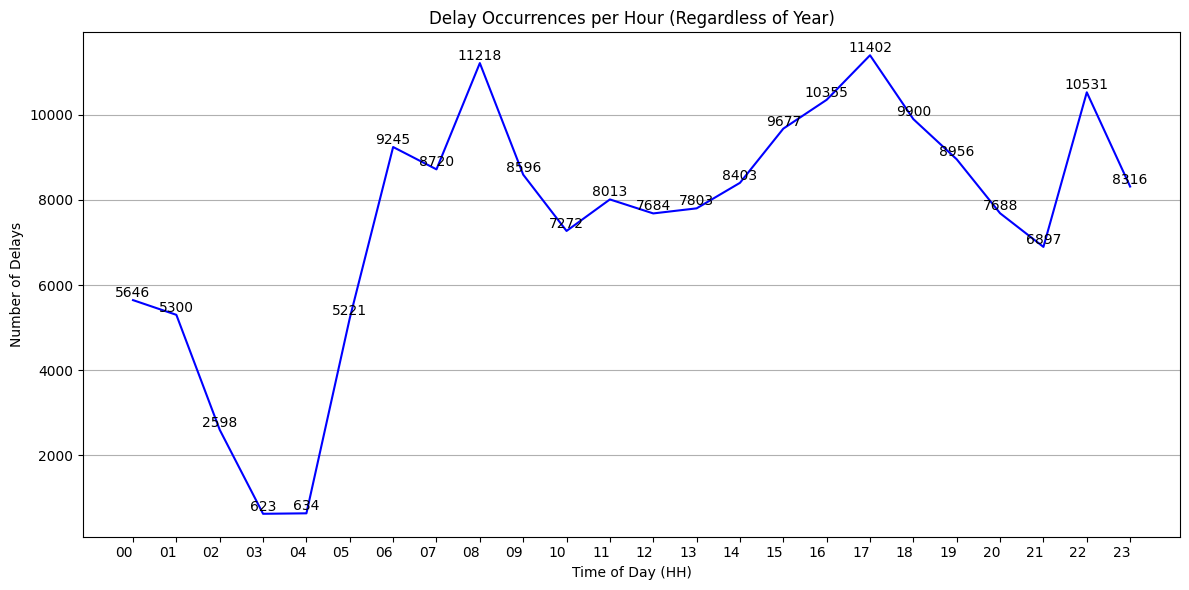

   Hour  delay_counts_per_hour_sansYear
17   17                           11402
8    08                           11218
22   22                           10531
16   16                           10355
18   18                            9900
15   15                            9677
6    06                            9245
19   19                            8956
7    07                            8720
9    09                            8596


In [ ]:
# to group data per Hour regardless of the year
df['Hour'] = df['DateTime'].dt.strftime('%H')
delay_counts_per_hour_sansYear = df.groupby('Hour')['DateTime'].count().reset_index(name = 'delay_counts_per_hour_sansYear')

# to plot in a chart
plt.figure(figsize=(12, 6))
plt.plot(delay_counts_per_hour_sansYear['Hour'], delay_counts_per_hour_sansYear['delay_counts_per_hour_sansYear'], color='blue')
for x, y in zip(delay_counts_per_hour_sansYear['Hour'], delay_counts_per_hour_sansYear['delay_counts_per_hour_sansYear']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.title('Delay Occurrences per Hour (Regardless of Year)')
plt.xlabel('Time of Day (HH)')
plt.xticks(delay_counts_per_hour_sansYear['Hour'][::], ha='right')
plt.ylabel('Number of Delays')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top_10_hours = delay_counts_per_hour_sansYear.sort_values(by=['delay_counts_per_hour_sansYear'], ascending=False).head(10)
print(top_10_hours)

In [ ]:
# to identify causes of delay during 17:00
category_counts = df[df['Hour'] == '17']['category'].value_counts()
category_counts['Average Duration'] = df.loc[df['Hour'] == '17', 'Min Delay'].mean()
print(category_counts)

category
Passenger Assistance Alarm Activated - No Trouble Found    1351.000000
Miscellaneous Speed Control                                1027.000000
Disorderly Patron                                           910.000000
Injured or ill Customer (In Station) - Transported          866.000000
Operator Overspeeding                                       837.000000
                                                              ...     
High Voltage                                                  1.000000
Low Voltage                                                   1.000000
Lighting System                                               1.000000
Traction Power Rail Related                                   1.000000
Average Duration                                              2.394843
Name: count, Length: 111, dtype: float64


In [ ]:
# to identify causes of delay during 8:00
category_counts = df[df['Hour'] == '08']['category'].value_counts()
category_counts['Average Duration'] = df.loc[df['Hour'] == '08', 'Min Delay'].mean()
print(category_counts)

category
Miscellaneous Speed Control                                 1635.000000
Operator Overspeeding                                        910.000000
Injured or ill Customer (On Train) - Medical Aid Refused     908.000000
Passenger Assistance Alarm Activated - No Trouble Found      869.000000
Injured or ill Customer (In Station) - Transported           683.000000
                                                               ...     
Mainline Storage                                               1.000000
T&S Related Problem - NTF                                      1.000000
Fire/Smoke Plan B - Source External to TTC                     1.000000
OPTO Operator Related                                          1.000000
Average Duration                                               2.145124
Name: count, Length: 117, dtype: float64


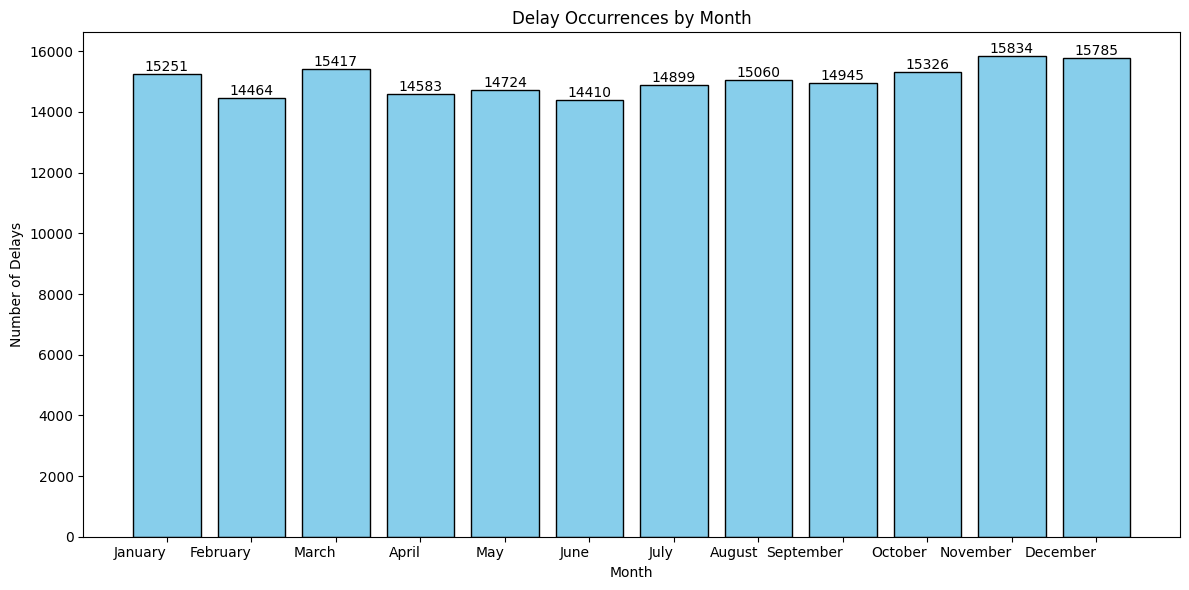

In [ ]:
# to group data per month
df['Months'] = df['DateTime'].dt.month
delay_counts_per_month_sansYear = df.groupby('Months')['DateTime'].count().reset_index(name = 'delay_counts_per_month_sansYear')

# to plot in bar chart
plt.figure(figsize=(12, 6))
plt.bar(delay_counts_per_month_sansYear['Months'], delay_counts_per_month_sansYear['delay_counts_per_month_sansYear'], color='skyblue', edgecolor='black')
for x, y in zip(delay_counts_per_month_sansYear['Months'], delay_counts_per_month_sansYear['delay_counts_per_month_sansYear']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.title('Delay Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(1, 13), month_names)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

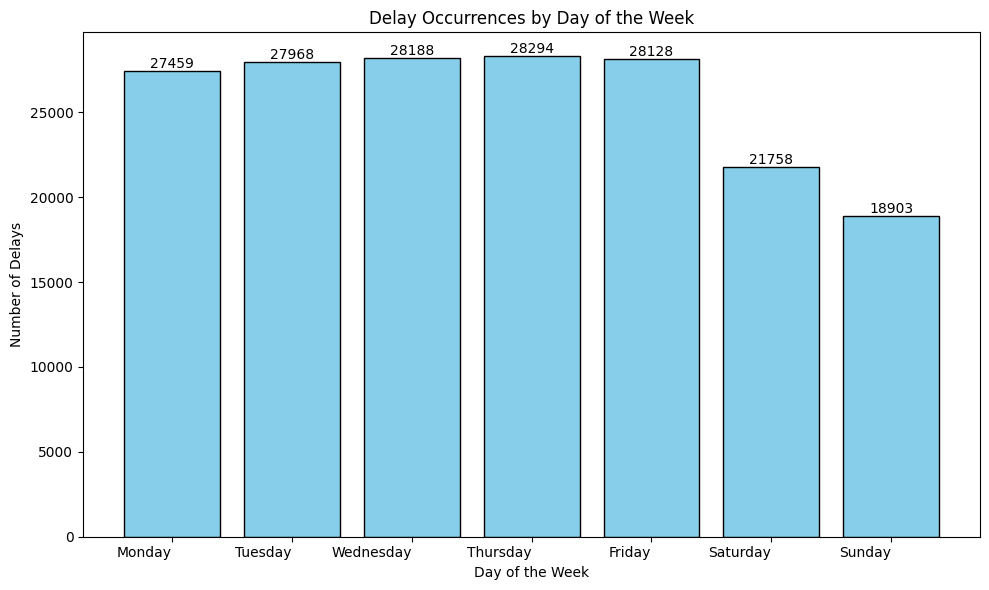

In [ ]:
# to group data per day of the week
df['DayOfWeek'] = df['DateTime'].dt.day_name()
delay_counts_per_day_sansYear = df.groupby('DayOfWeek')['Min Delay'].count().reset_index(name = 'delay_counts_per_day_sansYear')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_counts_per_day_sansYear['DayOfWeek'] = pd.Categorical(delay_counts_per_day_sansYear['DayOfWeek'], categories=days_order, ordered=True)
delay_counts_per_day_sansYear = delay_counts_per_day_sansYear.sort_values('DayOfWeek')

# plot in bar chart
plt.figure(figsize=(10, 6))
plt.bar(delay_counts_per_day_sansYear['DayOfWeek'], delay_counts_per_day_sansYear['delay_counts_per_day_sansYear'], color='skyblue', edgecolor='black')
for i, v in enumerate(delay_counts_per_day_sansYear['delay_counts_per_day_sansYear']):
    plt.text(i, v + 0.2, f'{v:.0f}', ha='center', va='bottom')

plt.title('Delay Occurrences by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delays')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['category'].unique()

array(['Priority One - Train in Contact With Person', 'Disorderly Patron',
       'Others', 'Unsanitary Vehicle',
       'Passenger Assistance Alarm Activated - No Trouble Found',
       'No Operator Immediately Available - Not E.S.A. Related ',
       'Operator Overspeeding', 'Graffiti / Scratchiti',
       'Misc. Transportation Other - Employee Non-Chargeable',
       'Miscellaneous Speed Control',
       'Emergency Alarm Station Activation',
       'Injured or ill Customer (On Train) - Medical Aid Refused',
       'Passenger Other',
       'Injured or ill Customer (On Train) - Transported',
       'Fire/Smoke Plan B - Source TTC', 'Operator Violated Signal',
       'Insulated Joint Related Problem', 'Escalator/Elevator Incident',
       'Unauthorized at Track Level', 'Assault / Patron Involved',
       'Door Problems - Faulty Equipment', 'Rail Cars & Shops Opr. Error',
       'Operator Overshot Platform', 'Door Problems - Debris Related',
       'No Operator Immediately Available ',

In [ ]:
# to remove trailing spaces
df['category'] = df['category'].str.strip()
df['category'] = df['category'].str.lstrip()
df['Station'] = df['Station'].str.strip()
df['Station'] = df['Station'].str.lstrip()

# to group causes into categories

personnel_related = ['ATC Operator Related',
                     'Crew Unable to Maintain Schedule',
                     'Divisional Clerk Related',
                     'ECD / Line Mechanic Related Prob.',
                     'Injured Employee',
                     'Misc. Transportation Other - Employee Non-Chargeable',
                     'No Operator Immediately Available',
                     'No Operator Immediately Available - Not E.S.A. Related',
                     'Operator Not In Position',
                     'Operator Overspeeding',
                     'Operator Overshot Platform',
                     'Operator Violated Signal',
                     'OPTO Operator Related',
                     'Rail Cars & Shops Opr. Error',
                     'RC&S Maintenance Error - (Human)',
                     'Signals Zone Countroller Failure',
                     'Supervisory Error',
                     'T & S Contractor Problems',
                     'T & S Operator Related Problems',
                     'Training Department Related Delays',
                     'Train Controls Improperly Shut Down',
                     'Transportation Department - Other',
                     'Two Drum Switch Keys Activated',
                     'Work Refusal']

equipment_related = ['Air Conditioning',
                     'Alternating Current',
                     'ATC Project',
                     'ATC RC&S Equipment',
                     'ATC Signals Other',
                     'Beacon Failure',
                     'Body',
                     'Brakes',
                     'Central Office Signalling System',
                     'Chopper Control',
                     'Compressed Air',
                     'Consequential Delay (2nd Delay Same Fault)',
                     'Couplers',
                     'Data Communications System Failure',
                     'Door Problems - Faulty Equipment',
                     'Doors Open in Error',
                     'EAS Failure',
                     'Escalator/Elevator Incident',
                     'Equipment - No Trouble Found',
                     'Graffiti / Scratchiti',
                     'High Voltage',
                     'Insulated Joint Related Problem',
                     'Lighting System',
                     'Low Voltage',
                     'Mainline Storage',
                     'Misc. Engineering & Construction Related Problems',
                     'No Equipment Available',
                     'OPTO RC&S Non-Train Door Monitoring',
                     'OPTO (COMMS) Train Door Monitoring',
                     'Overhead Door Contact',
                     'Propulsion System',
                     'Rail Related Problem',
                     'SCADA Related Problems',
                     'Signal Control Problem - Signals',
                     'Signal Control Problem - Track',
                     'Signal Problem - No Trouble',
                     'Signals Axle Counter Block Failure',
                     'Signals - Track Circuit Problems',
                     'Signals - Train Stops',
                     'Signals or Related Components Failure',
                     'Smart IO Failure',
                     'Speed Control Equipment',
                     'Storm Trains',
                     'Structure Related Problem',
                     'Subway Car Radio Fault',
                     'Subway Radio System Fault',
                     'TR Cab Doors',
                     'Track Circuit Problems - Re: Defective Bolts/Bonding',
                     'Track Switch Failure - Signal Related Problem',
                     'Track Switch Failure - Track Related Problem',
                     'Traction Motors',
                     'Traction Power or Related Components Failure',
                     'Traction Power Rail Related',
                     'Trainline System',
                     'Transit Control Related Problems',
                     'Trucks',
                     'Unsanitary Vehicle',
                     'Work Vehicle',
                     'Work Zone Problems - Track',
                     'Work Zone Problems - Signals',
                     'Yard/Carhouse Related Problems']

passenger_related = ['Assault / Employee Involved',
                     'Assault / Patron Involved',
                     'Disorderly Patron',
                     'Door Problems - Passenger Related',
                     'Held By Polce - Non-TTC Related',
                     'Injured or ill Customer (In Station) - Transported',
                     'Injured or ill Customer (In Station) - Medical Aid Refused',
                     'Injured or ill Customer (On Train) - Medical Aid Refused',
                     'Injured or ill Customer (On Train) - Transported',
                     'Passenger Assistance Alarm Activated - No Trouble Found',
                     'Passenger Other',
                     'Priority One - Train in Contact With Person',
                     'Robbery',
                     'Sexual Assault',
                     'Station Stairway Incident',
                     'Unauthorized at Track Level']

fortuitous_events = ['Bomb Threat',
                      'Collector Booth Alarm Activated',
                      'Door Problems - Debris Related',
                      'Emergency Alarm Station Activation',
                      'Fire/Smoke Plan A',
                      'Fire/Smoke Plan B - Source TTC',
                      'Fire/Smoke Plan B - Source External to TTC',
                      'Fire/Smoke Plan C',
                      'Force Majeure',
                      'Ice / Snow Related Problems',
                      'Signals Track Weather Related',
                      'Suspicious Package',
                      'Track Level Debris - Controllable',
                      'Weather Reports / Related Delays',
                      'Warning Alarm Systems']

undefined = ['Miscellaneous General Delays',
             'Miscellaneous Other',
             'Miscellaneous Speed Control',
             'Other',
             'Others',
             'RC&S Other',
             'S/E/C Department Other',
             'Station Other',
             'T&S Related Problem - NTF',
             'T&S Other']

# to create data frames for each category
df_personnel_related = df[df['category'].isin(personnel_related)]
df_equipment_related = df[df['category'].isin(equipment_related)]
df_passenger_related = df[df['category'].isin(passenger_related)]
df_fortuitous_events = df[df['category'].isin(fortuitous_events)]
df_undefined = df[df['category'].isin(undefined)]

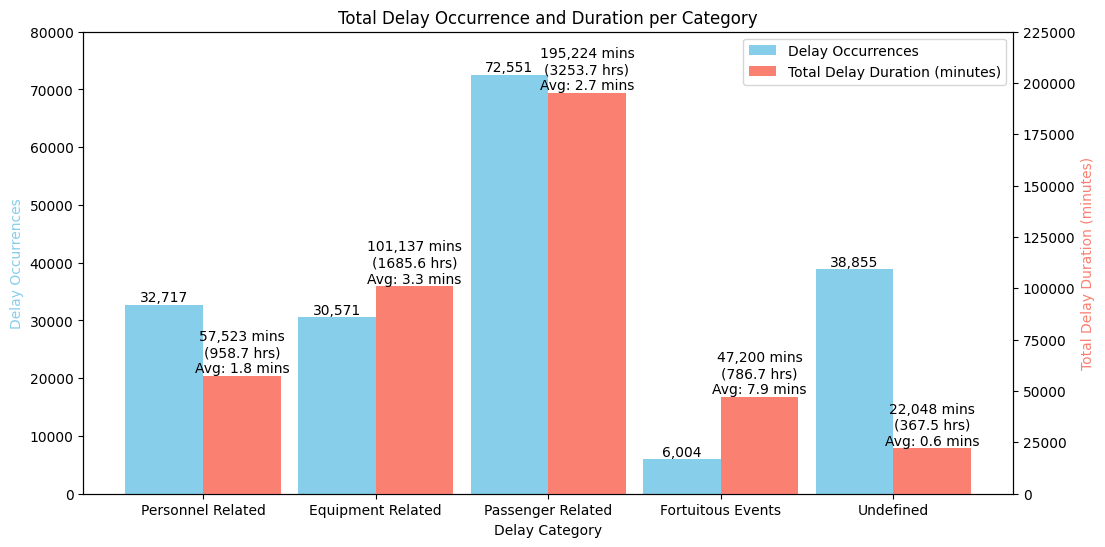

In [ ]:
# Get the categories and data
categories = ['Personnel Related', 'Equipment Related', 'Passenger Related', 'Fortuitous Events', 'Undefined']
delay_counts = [len(df_personnel_related), len(df_equipment_related), len(df_passenger_related), len(df_fortuitous_events), len(df_undefined)]
durations_minutes = [df_personnel_related['Min Delay'].sum(), df_equipment_related['Min Delay'].sum(), df_passenger_related['Min Delay'].sum(), df_fortuitous_events['Min Delay'].sum(), df_undefined['Min Delay'].sum()]
durations_hours = [duration / 60 for duration in durations_minutes]

# Calculate average delay lengths
avg_delay_lengths = [df_personnel_related['Min Delay'].mean(), df_equipment_related['Min Delay'].mean(), df_passenger_related['Min Delay'].mean(), df_fortuitous_events['Min Delay'].mean(), df_undefined['Min Delay'].mean()]

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(categories))
width = 0.45
rects1 = ax1.bar(x - width/2, delay_counts, width, label='Delay Occurrences', color='skyblue')
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, durations_minutes, width, label='Total Delay Duration (minutes)', color='salmon')
ax1.set_xlabel('Delay Category')
ax1.set_ylabel('Delay Occurrences', color='skyblue')
ax1.set_ylim(top = 80000)
ax2.set_ylabel('Total Delay Duration (minutes)', color='salmon')
ax2.set_ylim(top = 225000)
plt.title('Total Delay Occurrence and Duration per Category')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation = 0, ha='center')

# Add data labels for delay occurrences
for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', color='black')

# Add data labels for total delay duration in minutes, hours, and average length
for rect, duration_hours, avg_length in zip(rects2, durations_hours, avg_delay_lengths):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height,
             f'{int(height):,} mins\n({duration_hours:.1f} hrs)\nAvg: {avg_length:.1f} mins',
             ha='center', va='bottom', color='black')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust layout
plt.show()

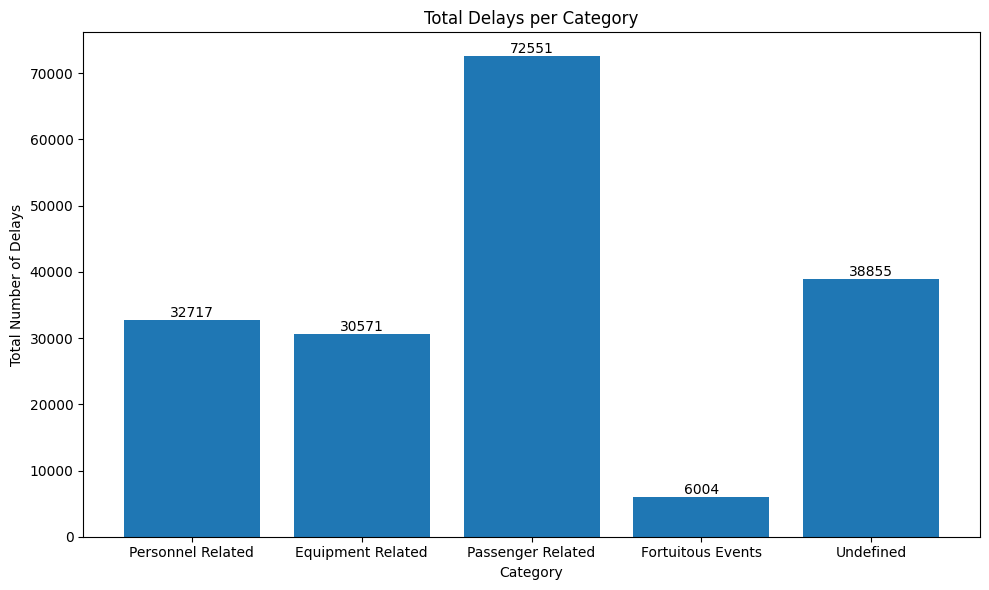

In [ ]:
# to plot in a chart
category_counts = {
    'Personnel Related': len(df_personnel_related),
    'Equipment Related': len(df_equipment_related),
    'Passenger Related': len(df_passenger_related),
    'Fortuitous Events': len(df_fortuitous_events),
    'Undefined': len(df_undefined)
}

categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.0f}', ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Total Number of Delays')
plt.title('Total Delays per Category')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

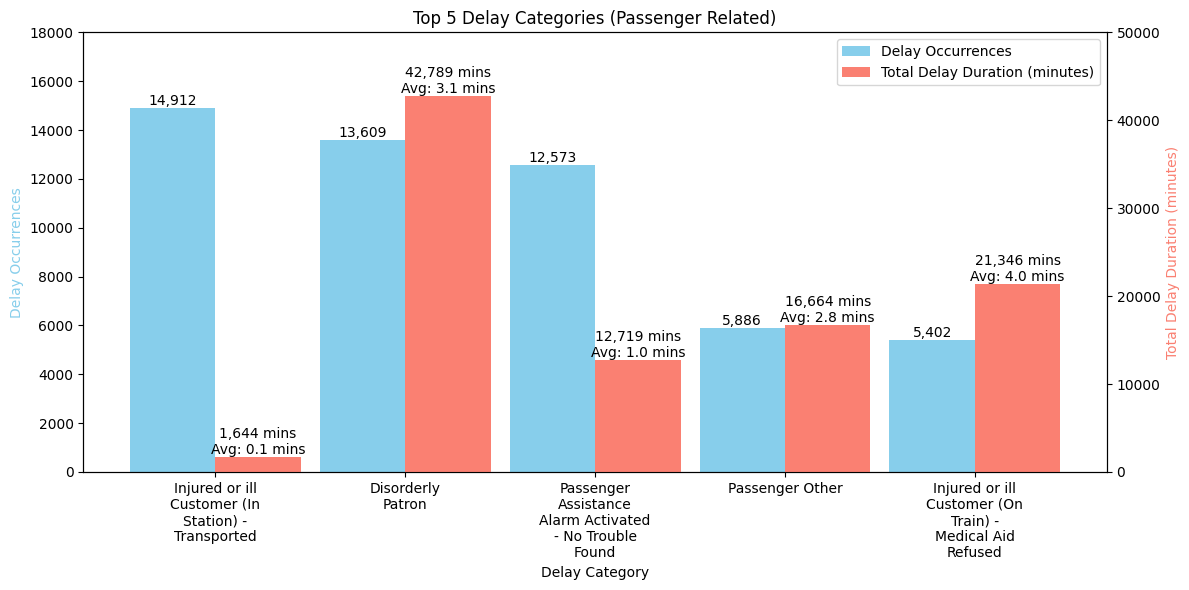

In [ ]:
# Passenger Related
top_5_categories = df_passenger_related['category'].value_counts().nlargest(5).index.tolist()
occurrences = df_passenger_related['category'].value_counts().nlargest(5).tolist()
durations = [df_passenger_related[df_passenger_related['category'] == category]['Min Delay'].sum() for category in top_5_categories]

# Calculate average delay lengths
avg_delays = [duration / occurrence for duration, occurrence in zip(durations, occurrences)]

# Create bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(top_5_categories))
width = 0.45
rects1 = ax1.bar(x - width/2, occurrences, width, label='Delay Occurrences', color='skyblue')
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, durations, width, label='Total Delay Duration (minutes)', color='salmon')

# Set labels and titles
ax1.set_xlabel('Delay Category')
ax1.set_ylabel('Delay Occurrences', color='skyblue')
ax1.set_ylim(top = 18000)
ax2.set_ylabel('Total Delay Duration (minutes)', color='salmon')
ax2.set_ylim(top = 50000)
plt.title('Top 5 Delay Categories (Passenger Related)')

# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticks(x)
wrapped_labels = [textwrap.fill(label, 15) for label in top_5_categories]
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# Add data labels for delay occurrences
for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', color='black')

# Add data labels for total delay duration in minutes and average length
for rect, duration, avg_delay in zip(rects2, durations, avg_delays):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height,
             f'{int(duration):,} mins\nAvg: {avg_delay:.1f} mins',
             ha='center', va='bottom', color='black')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.tight_layout()
plt.show()

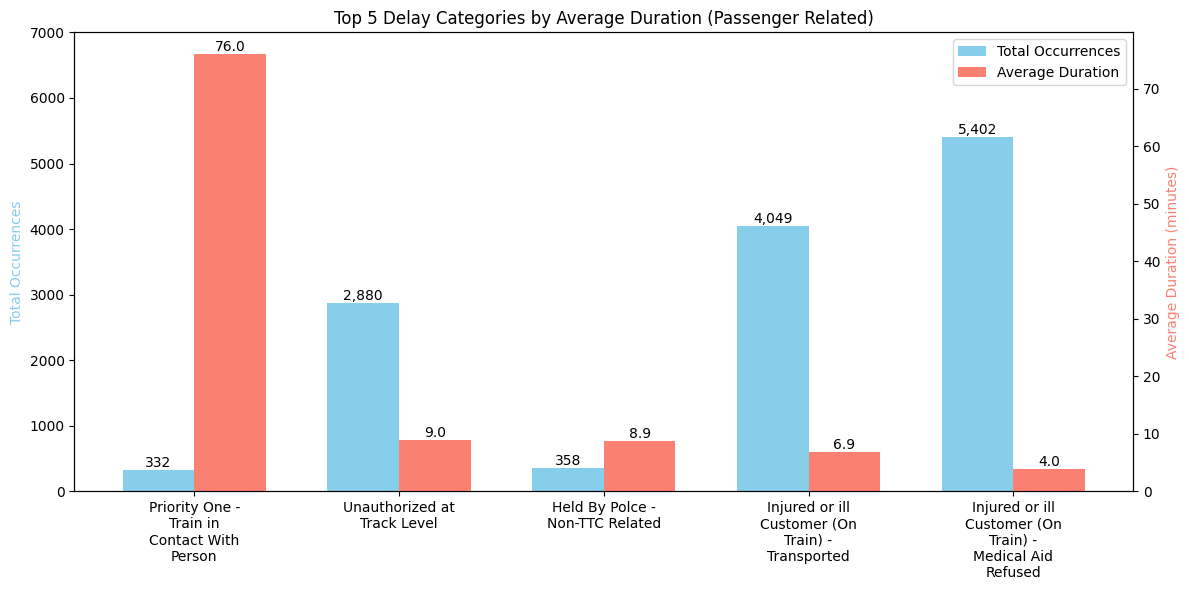

In [ ]:
# Calculate average duration and occurrences for each category
category_data = df_passenger_related.groupby('category').agg(
    Average_Duration=('Min Delay', 'mean'),
    Occurrences=('Min Delay', 'count')
).sort_values(by=['Average_Duration'], ascending=False).head(5)  # Top 5

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width and positions
width = 0.35
x = np.arange(len(category_data))

# Primary axis for Occurrences
rects1 = ax1.bar(x - width/2, category_data['Occurrences'], width, label='Total Occurrences', color='skyblue')
ax1.set_ylabel('Total Occurrences', color='skyblue')

# Secondary axis for average duration
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, category_data['Average_Duration'], width, label='Average Duration', color='salmon')
ax2.set_ylabel('Average Duration (minutes)', color='salmon')

# Set the title
plt.title('Top 5 Delay Categories by Average Duration (Passenger Related)')
ax1.set_ylim(top = 7000)

# Set x-axis ticks and labels
ax1.set_xticks(x)
wrapped_labels = [textwrap.fill(label, 15) for label in category_data.index]
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# to add data labels
for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', color='black')
for rect in rects2:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', color='black')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

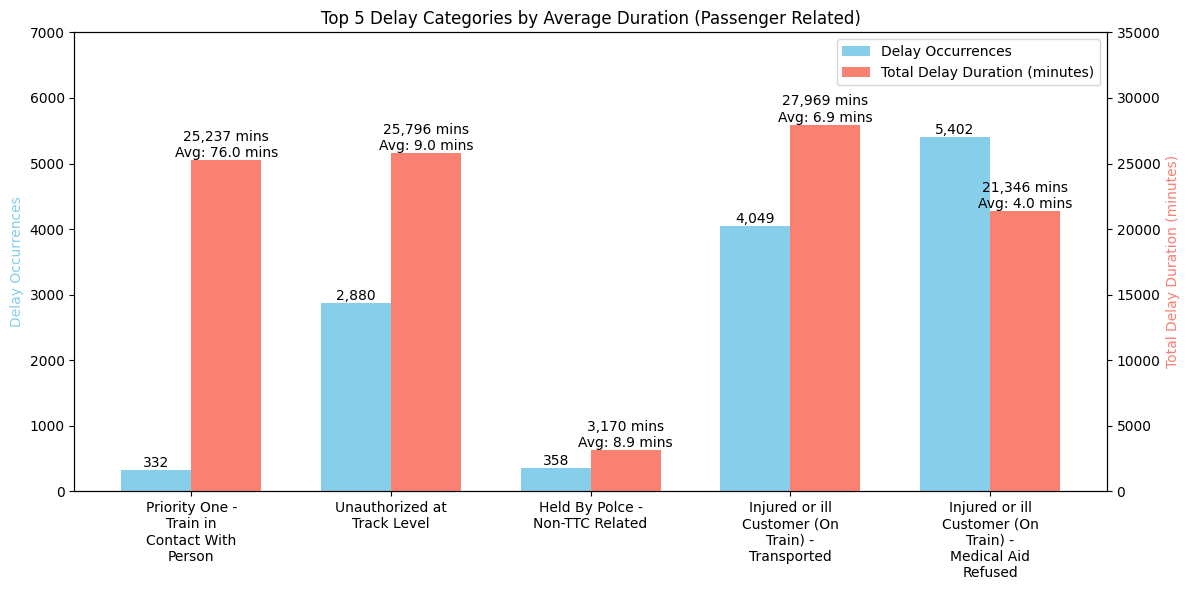

In [ ]:
# Calculate average duration, occurrences, and total duration for each category
category_data = df_passenger_related.groupby('category').agg(
    Average_Duration=('Min Delay', 'mean'),
    Occurrences=('Min Delay', 'count'),
    Total_Duration=('Min Delay', 'sum')
).sort_values(by=['Average_Duration'], ascending=False).head(5)  # Top 5


# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width and positions
width = 0.35
x = np.arange(len(category_data))

# Primary axis for Occurrences
rects1 = ax1.bar(x - width/2, category_data['Occurrences'], width, label='Delay Occurrences', color='skyblue')
ax1.set_ylabel('Delay Occurrences', color='skyblue')

# Secondary axis for Total Duration
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, category_data['Total_Duration'], width, label='Total Delay Duration (minutes)', color='salmon')
ax2.set_ylabel('Total Delay Duration (minutes)', color='salmon')

# Set the title
plt.title('Top 5 Delay Categories by Average Duration (Passenger Related)')

# Set x-axis ticks and labels
ax1.set_xticks(x)
wrapped_labels = [textwrap.fill(label, 15) for label in category_data.index]
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# to add data labels
for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', color='black')
for rect, avg_duration in zip(rects2, category_data['Average_Duration']):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height,
             f'{int(height):,} mins\nAvg: {avg_duration:.1f} mins',
             ha='center', va='bottom', color='black')
ax1.set_ylim(top = 7000)
ax2.set_ylim(top = 35000)
# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

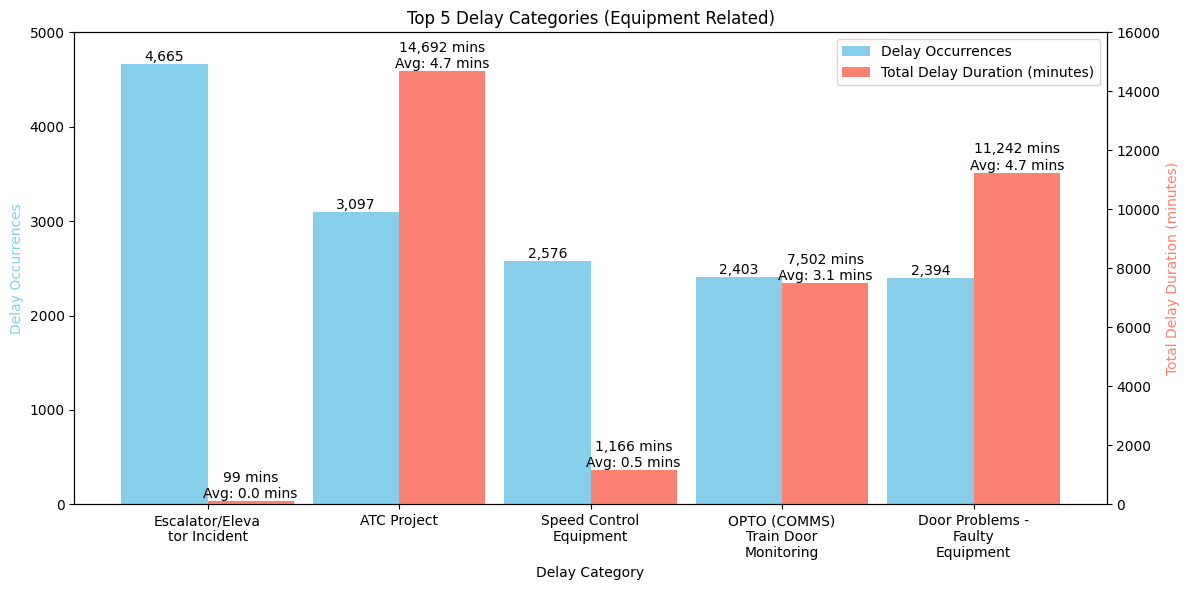

In [ ]:
# Equipment Related
top_5_categories = df_equipment_related['category'].value_counts().nlargest(5).index.tolist()
occurrences = df_equipment_related['category'].value_counts().nlargest(5).tolist()
durations = [df_equipment_related[df_equipment_related['category'] == category]['Min Delay'].sum() for category in top_5_categories]

# Calculate average delay lengths
avg_delays = [duration / occurrence for duration, occurrence in zip(durations, occurrences)]

# Create bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(top_5_categories))
width = 0.45
rects1 = ax1.bar(x - width/2, occurrences, width, label='Delay Occurrences', color='skyblue')
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, durations, width, label='Total Delay Duration (minutes)', color='salmon')

# Set labels and titles
ax1.set_xlabel('Delay Category')
ax1.set_ylabel('Delay Occurrences', color='skyblue')
ax1.set_ylim(top = 5000)
ax2.set_ylabel('Total Delay Duration (minutes)', color='salmon')
ax2.set_ylim(top = 16000)
plt.title('Top 5 Delay Categories (Equipment Related)')

# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticks(x)
wrapped_labels = [textwrap.fill(label, 15) for label in top_5_categories]
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# Add data labels for delay occurrences
for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', color='black')

# Add data labels for total delay duration in minutes and average length
for rect, duration, avg_delay in zip(rects2, durations, avg_delays):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height,
             f'{int(duration):,} mins\nAvg: {avg_delay:.1f} mins',
             ha='center', va='bottom', color='black')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

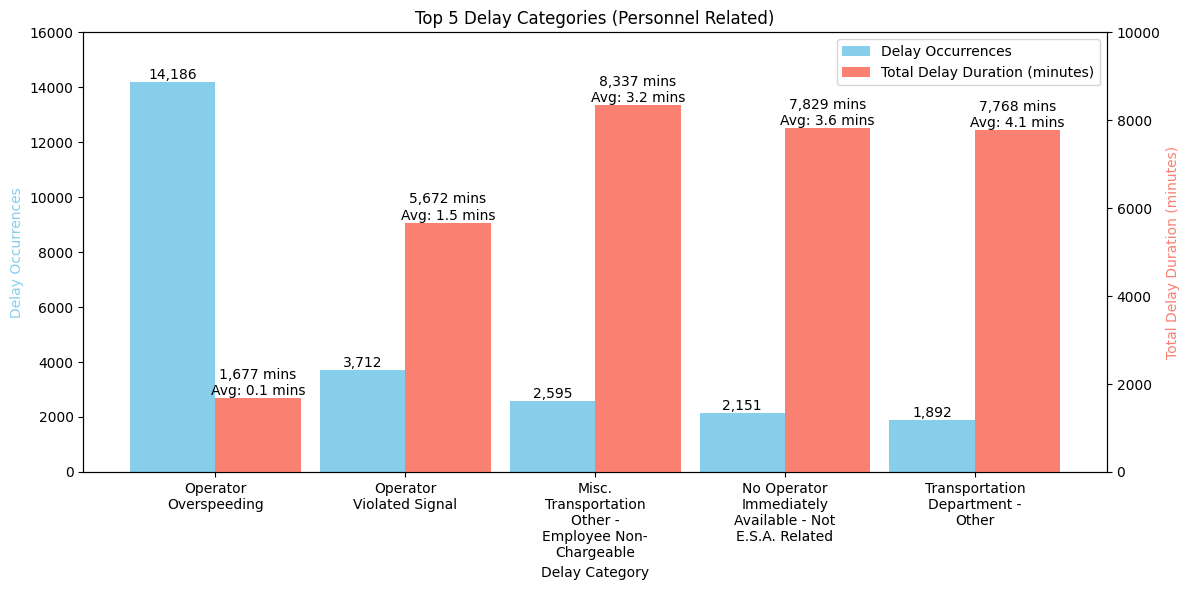

In [ ]:
# Personnel Related
top_5_categories = df_personnel_related['category'].value_counts().nlargest(5).index.tolist()
occurrences = df_personnel_related['category'].value_counts().nlargest(5).tolist()
durations = [df_personnel_related[df_personnel_related['category'] == category]['Min Delay'].sum() for category in top_5_categories]

# Calculate average delay lengths
avg_delays = [duration / occurrence for duration, occurrence in zip(durations, occurrences)]

# Create bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(top_5_categories))
width = 0.45
rects1 = ax1.bar(x - width/2, occurrences, width, label='Delay Occurrences', color='skyblue')
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, durations, width, label='Total Delay Duration (minutes)', color='salmon')

# Set labels and titles
ax1.set_xlabel('Delay Category')
ax1.set_ylabel('Delay Occurrences', color='skyblue')
ax1.set_ylim(top = 16000)
ax2.set_ylabel('Total Delay Duration (minutes)', color='salmon')
ax2.set_ylim(top = 10000)
plt.title('Top 5 Delay Categories (Personnel Related)')

# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticks(x)
wrapped_labels = [textwrap.fill(label, 15) for label in top_5_categories]
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# Add data labels for delay occurrences
for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', color='black')

# Add data labels for total delay duration in minutes and average length
for rect, duration, avg_delay in zip(rects2, durations, avg_delays):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height,
             f'{int(duration):,} mins\nAvg: {avg_delay:.1f} mins',
             ha='center', va='bottom', color='black')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

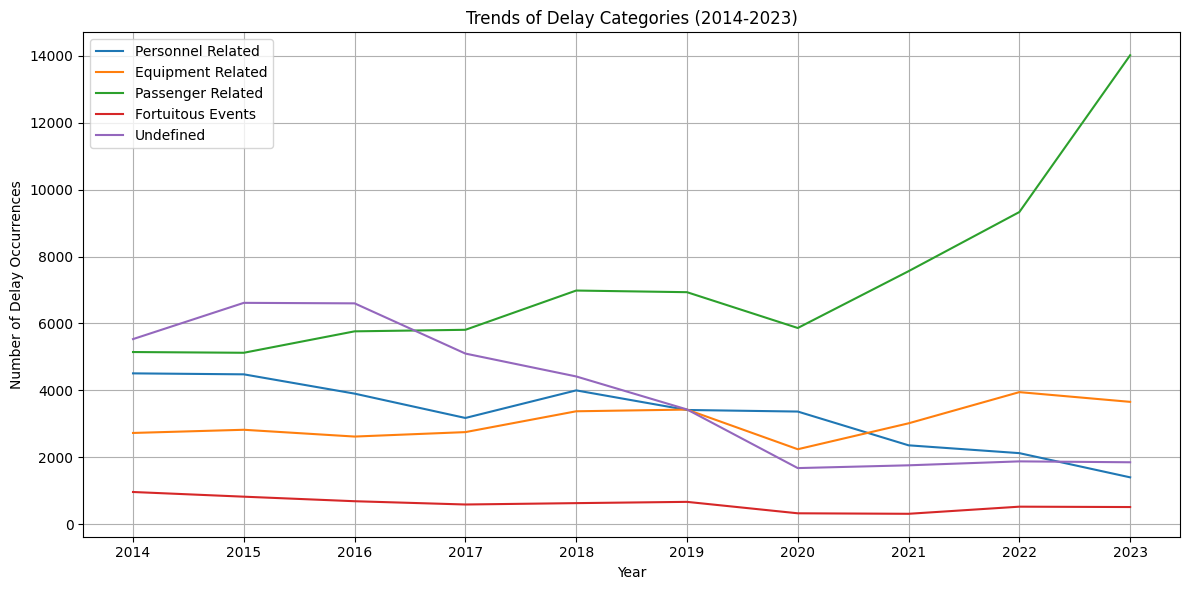

In [ ]:
# to show annual trends in categories
personnel_counts = df_personnel_related.groupby(df_personnel_related['Date'].dt.year)['Min Delay'].count()
equipment_counts = df_equipment_related.groupby(df_equipment_related['Date'].dt.year)['Min Delay'].count()
passenger_counts = df_passenger_related.groupby(df_passenger_related['Date'].dt.year)['Min Delay'].count()
fortuitous_counts = df_fortuitous_events.groupby(df_fortuitous_events['Date'].dt.year)['Min Delay'].count()
undefined_counts = df_undefined.groupby(df_undefined['Date'].dt.year)['Min Delay'].count()

plt.figure(figsize=(12, 6))
plt.plot(personnel_counts.index, personnel_counts.values, label='Personnel Related')
plt.plot(equipment_counts.index, equipment_counts.values, label='Equipment Related')
plt.plot(passenger_counts.index, passenger_counts.values, label='Passenger Related')
plt.plot(fortuitous_counts.index, fortuitous_counts.values, label='Fortuitous Events')
plt.plot(undefined_counts.index, undefined_counts.values, label='Undefined')

plt.title('Trends of Delay Categories (2014-2023)')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Year')
plt.ylabel('Number of Delay Occurrences')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
unique_stations = np.sort(df['Station'].unique())
len(unique_stations)

910

In [ ]:
unique_stations

array(['169 DANFORTH AVENUE', '1900 YONGE STREET', 'ALL OPEN CUTS',
       'ALLEN RD (N OF EGLINTO', 'APPROCHING OLD MILL ST',
       'ASQUITH SUBSTATION', 'ATC AREA', 'ATC FAILURE', 'ATC TERRIROTY',
       'ATC TERRITORY', 'BATHURST STATION', 'BATHURST TO CASTLE FRA',
       'BATHUSRT STATION', 'BAY AND BLOOR', 'BAY LOWER',
       'BAY LOWER STATION', 'BAY STATION', 'BAYVIEW STATION',
       'BD LINE CHANGEOVERS', 'BEDFORD SUBSTATION', 'BESSARION STATION',
       'BETWEEN SHEPPARD AND S', 'BIRCHMOUNT EE',
       'BIRCHMOUNT EMERGENCY E', 'BLOOR - DANFORTH LINE',
       'BLOOR AND ABERFOYLE CR', 'BLOOR DANFORTH LINE',
       'BLOOR DANFORTH SUBWAY', 'BLOOR DANFORTH/YONGE U',
       'BLOOR HAYDEN ENTRANCE', 'BLOOR HUB', 'BLOOR INTERLOCKING',
       'BLOOR SATION', 'BLOOR SOUTH', 'BLOOR STATION',
       'BLOOR STATION (STATION', 'BLOOR STATION TO YORK', 'BLOOR STATON',
       'BLOOR TO COLLEGE', 'BLOOR TO DAVISVILLE',
       'BLOOR TO DAVISVILLE ST', 'BLOOR TO EGLINTON',
       'BLOOR TO

In [ ]:
line_1_stations = ['KIPLING STATION',
                   ]